
#### Author of Jupyter Notebook : Monika Avila Marquez 

#### References: based on https://cran.r-project.org/web/packages/plm/vignettes/B_plmFunction.html

(All possible mistakes are my responsability and encourage you to email me in case you find any)

### TWO WAY ERROR COMPONENT MODEL

In this Jupyter Notebook, I provide the implementation of Example 3.6.1 of Chapter3 Two way Error Component Model of Badi Baltagi, Econometric Analysis of Panel Data, 5th. 

Goals:

1. Estimation of the Grunfeld investment equation using a Two-Way Error Component Model.  

Grunfeld (1958) considers the investment equation: 

$$I_{it}=\alpha+\beta_1F_{it}+\beta_2C_{it}+\nu_i+\lambda_t+\epsilon_{it};$$

where: 

$I_{it}$: real gross investment of firm $i$ in period $t$.

$F_{it}$: real value of tfirm $i$ in period $t$ (shares outstanding). 

$C_{it}$: real value of the capital stock of firm $i$ in period $t$.

$\nu_i$: the individual specific effect. 

$\lambda_t$:the time specific effect.

$\epsilon_{it}$: disturbance term;

The panel is balanced and is composed of 20 firms observed over 20 years for the period 1935-1954. 

We aim to estimate this regression using Pooled, FE specification, uncorrelated RE specification. 

2. Test for correlation of specific effects 


1. Estimation of the Grunfeld investment equation using a Two-Way Error Component Model.  


In [2]:
install.packages('AER')
install.packages('plm')
install.packages('stargazer')
install.packages('screenreg')

Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'AER' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Monika\AppData\Local\Temp\RtmpewMvi8\downloaded_packages


Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
    binary source needs_compilation
plm  2.2-3  2.4-1             FALSE



installing the source package 'plm'

Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Monika\AppData\Local\Temp\RtmpewMvi8\downloaded_packages


Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'screenreg' is not available (for R version 3.5.0)"

In [3]:
install.packages('screenreg')

Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'screenreg' is not available (for R version 3.5.0)"

In [4]:
library(AER)
library(plm)
library(stargazer)
library(screenreg)

Warning message:
"package 'AER' was built under R version 3.5.3"Loading required package: car
Warning message:
"package 'car' was built under R version 3.5.2"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.5.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.5.2"Loading required package: survival
Warning message:
"package 'stargazer' was built under R version 3.5.2"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



ERROR: Error in library(screenreg): there is no package called 'screenreg'


In [7]:
# 1.1. Upload data  
data("Grunfeld", package = "plm")
head(Grunfeld)

firm,year,inv,value,capital
1,1935,317.6,3078.5,2.8
1,1936,391.8,4661.7,52.6
1,1937,410.6,5387.1,156.9
1,1938,257.7,2792.2,209.2
1,1939,330.8,4313.2,203.4
1,1940,461.2,4643.9,207.2


In [8]:
# 1.1. Data exploration
# 1.1.1 Size or amount of data
summary(Grunfeld)
nrow(Grunfeld)
# 1.1.2 Completeness of the data
NROW(na.omit(Grunfeld))
# 1.1.3 Correctness of the data
#We do not have much info about this so we can 
#assume data is correct and no measurement error on the variables


      firm           year           inv              value        
 Min.   : 1.0   Min.   :1935   Min.   :   0.93   Min.   :  58.12  
 1st Qu.: 3.0   1st Qu.:1940   1st Qu.:  33.56   1st Qu.: 199.97  
 Median : 5.5   Median :1944   Median :  57.48   Median : 517.95  
 Mean   : 5.5   Mean   :1944   Mean   : 145.96   Mean   :1081.68  
 3rd Qu.: 8.0   3rd Qu.:1949   3rd Qu.: 138.04   3rd Qu.:1679.85  
 Max.   :10.0   Max.   :1954   Max.   :1486.70   Max.   :6241.70  
    capital       
 Min.   :   0.80  
 1st Qu.:  79.17  
 Median : 205.60  
 Mean   : 276.02  
 3rd Qu.: 358.10  
 Max.   :2226.30  

[1] 200

[1] 200

In [9]:
N=10
T=20

Warning message in plot.window(...):
""reg.line" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""reg.line" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"Warning message in box(...):
""reg.line" is not a graphical parameter"Warning message in title(...):
""reg.line" is not a graphical parameter"Warning message in scatterplot.default(X[, 2], X[, 1], groups = X[, 3], xlab = xlab, :
"number of groups exceeds number of available colors
  colors are recycled"

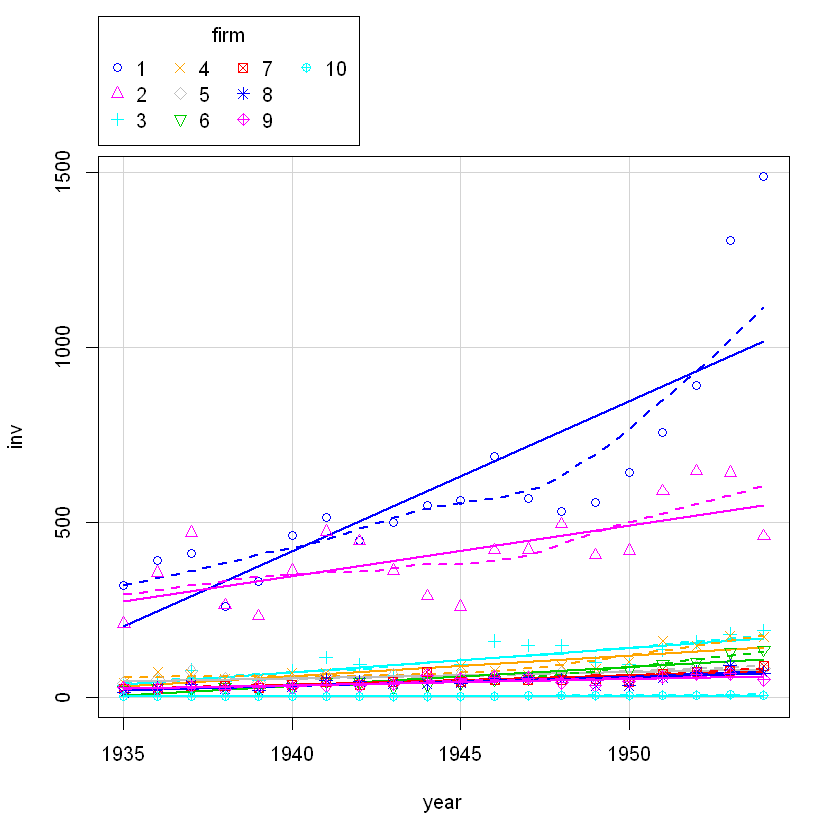

In [10]:
# 1.1.4 Graphical analysis 
scatterplot(inv~year|firm, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=Grunfeld)


In [11]:
# 1.2. Data modeling
# 1.2.1 Naive pooled OLS
ols <-lm(inv ~ value + capital, data=Grunfeld)
summary(ols)


Call:
lm(formula = inv ~ value + capital, data = Grunfeld)

Residuals:
    Min      1Q  Median      3Q     Max 
-291.68  -30.01    5.30   34.83  369.45 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.714369   9.511676  -4.491 1.21e-05 ***
value         0.115562   0.005836  19.803  < 2e-16 ***
capital       0.230678   0.025476   9.055  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 94.41 on 197 degrees of freedom
Multiple R-squared:  0.8124,	Adjusted R-squared:  0.8105 
F-statistic: 426.6 on 2 and 197 DF,  p-value: < 2.2e-16



Problems? 

Ignoring unobserved firm and time specific heterogeneity can cause two issues depending on the correlation of this heterogeneity with the regressors. As a result, OLS is not the most efficient neither consistent if the unoberserved effects are correlated to the regressors. 


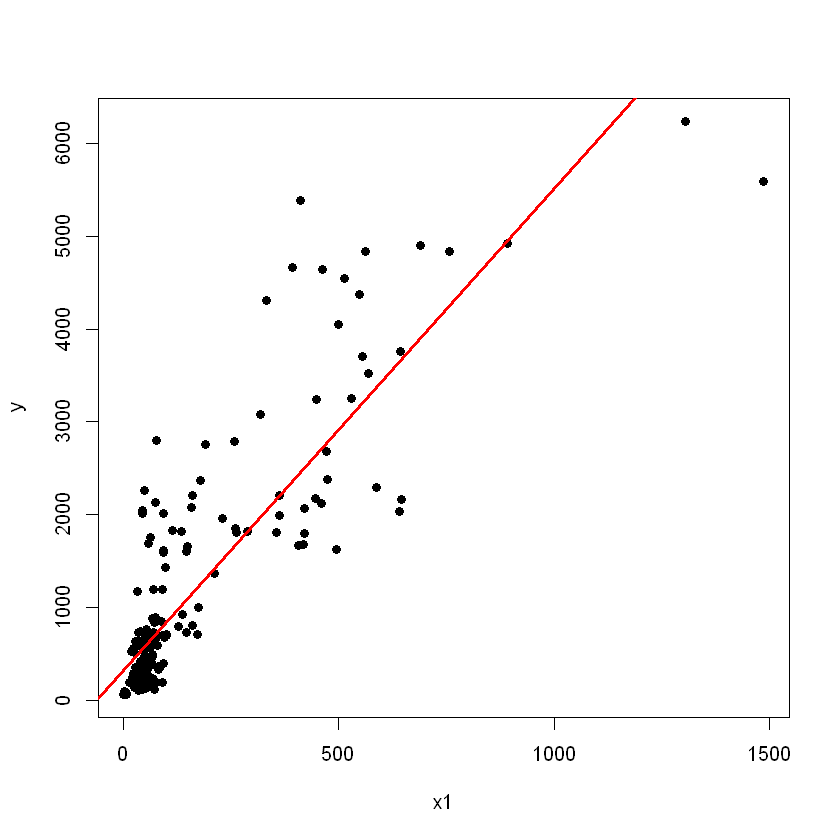

In [30]:

yhat <- ols$fitted
plot(Grunfeld$inv, Grunfeld$value, pch=19, xlab="x1", ylab="y")
abline(lm(Grunfeld$value~Grunfeld$inv),lwd=3, col="red")

We can see that the fitting of a linear pooling the data might not be the best. 

In [31]:
# 1.2.2 Way Random Effects Model 
Grw <- plm(inv ~ value + capital, Grunfeld, model = "random", effect = "twoways", 
           random.method = "walhus", random.dfcor = 3)
Grs <- update(Grw, random.method = "swar")
Gra <- update(Grw, random.method = "amemiya")

summary(Grw)

Twoways effects Random Effect Model 
   (Wallace-Hussain's transformation)

Call:
plm(formula = inv ~ value + capital, data = Grunfeld, effect = "twoways", 
    model = "random", random.method = "walhus", random.dfcor = 3)

Balanced Panel: n = 10, T = 20, N = 200

Effects:
                  var std.dev share
idiosyncratic 3061.74   55.33 0.287
individual    7623.78   87.31 0.713
time             0.00    0.00 0.000
theta: 0.8597 (id) 0 (time) 0 (total)

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-177.8486  -19.9495    4.7488   19.5289  252.9392 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)    
(Intercept) -57.817054  28.632578 -2.0193  0.04346 *  
value         0.109776   0.010473 10.4818  < 2e-16 ***
capital       0.308069   0.017186 17.9258  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    2384400
Residual Sum of Squares: 549470
R-Squared:      0.76956
Adj. R-Squared: 0.76722
Chisq: 657.888

2 way random effects model. 


In [25]:
# 1.2.3.Within Estimation: This is the optimal to avoid incidental parameter bias. 
# Obtain demeaned data
Panel_demeaned <- with(Grunfeld,
            data.frame(inv_w = inv - ave(inv, firm)-ave(inv, year)+ave(inv),
            c_w = capital - ave(capital, firm)- ave(capital, year)+ave(capital),v_w = value - ave(value, firm)- ave(value, year)+ave(value)))
# Estimate the regression
summary(lm(inv_w ~ c_w +v_w- 1, data = Panel_demeaned))


Call:
lm(formula = inv_w ~ c_w + v_w - 1, data = Panel_demeaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-162.609  -19.471   -1.267   19.128  211.842 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
c_w  0.35792    0.02099  17.052   <2e-16 ***
v_w  0.11772    0.01270   9.266   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.79 on 198 degrees of freedom
Multiple R-squared:  0.7201,	Adjusted R-squared:  0.7173 
F-statistic: 254.8 on 2 and 198 DF,  p-value: < 2.2e-16


2 way FE  model

In [17]:
install.packages("plm")
library(plm)

Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependency 'lmtest'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
lmtest 0.9-37 0.9-38              TRUE
plm     2.2-3  2.4-1             FALSE

  Binaries will be installed
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Monika\AppData\Local\Temp\Rtmp8IYTWk\downloaded_packages


installing the source package 'plm'



In [24]:
# Within Estimation: Another option in R 
# (Reference for this section: https://www.econometrics-with-r.org/10-3-fixed-effects-regression.html)
# install and load the 'plm' package

# estimate the fixed effects regression with plm()
wi <- plm(inv ~ value + capital,data = Grunfeld, model="within", effect = "twoways")
summary(wi)

Twoways effects Within Model

Call:
plm(formula = inv ~ value + capital, data = Grunfeld, effect = "twoways", 
    model = "within")

Balanced Panel: n = 10, T = 20, N = 200

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-162.6094  -19.4710   -1.2669   19.1277  211.8420 

Coefficients:
        Estimate Std. Error t-value  Pr(>|t|)    
value   0.117716   0.013751  8.5604 6.653e-15 ***
capital 0.357916   0.022719 15.7540 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    1615600
Residual Sum of Squares: 452150
R-Squared:      0.72015
Adj. R-Squared: 0.67047
F-statistic: 217.442 on 2 and 169 DF, p-value: < 2.22e-16

2. Test for correlation of specific effects 

In [28]:
phtest(wi, Grw)


	Hausman Test

data:  inv ~ value + capital
chisq = 13.55, df = 2, p-value = 0.001142
alternative hypothesis: one model is inconsistent


With a S.L. of 5% we reject the H_o and conclude that the specific effects are correlated to the included regressors. 
Thus, the FE is preferable to the RE specification.
